In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
os.chdir('/content/drive/My Drive/DM')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data_src = pd.read_csv('ED_lab_6/k_means_data.csv')
print(data_src)
data = np.array(data_src)

        X      Y
0   25.23  41.09
1   45.10  35.69
2   26.59  37.21
3   27.80  36.93
4   28.56  40.21
5   29.49  43.05
6   30.04  38.33
7   31.25  39.03
8   31.35  40.98
9   42.95  30.91
10  37.30  38.42
11  37.39  43.69
12  32.53  52.18
13  33.60  42.20
14  24.60  37.88
15  33.76  53.60
16  34.97  54.72
17  35.84  57.04
18  47.16  31.52
19  36.58  55.76
20  46.82  34.33
21  46.98  38.03
22  45.34  33.02
23  45.70  36.63
24  48.12  54.53
25  47.25  51.99
26  38.48  56.41
27  34.10  58.45
28  39.81  49.98
29  40.47  43.18
30  40.66  46.02
31  41.59  48.86
32  42.05  46.89
33  43.04  43.52
34  43.34  50.49
35  44.17  48.94
36  44.23  52.81
37  45.19  52.05
38  46.68  55.59
39  47.98  56.47


In [ ]:
Label = np.zeros((len(data),1),dtype=np.float64)
Label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
NewData = np.concatenate([data,Label],axis=1)
NewData

array([[25.23, 41.09,  0.  ],
       [45.1 , 35.69,  0.  ],
       [26.59, 37.21,  0.  ],
       [27.8 , 36.93,  0.  ],
       [28.56, 40.21,  0.  ],
       [29.49, 43.05,  0.  ],
       [30.04, 38.33,  0.  ],
       [31.25, 39.03,  0.  ],
       [31.35, 40.98,  0.  ],
       [42.95, 30.91,  0.  ],
       [37.3 , 38.42,  0.  ],
       [37.39, 43.69,  0.  ],
       [32.53, 52.18,  0.  ],
       [33.6 , 42.2 ,  0.  ],
       [24.6 , 37.88,  0.  ],
       [33.76, 53.6 ,  0.  ],
       [34.97, 54.72,  0.  ],
       [35.84, 57.04,  0.  ],
       [47.16, 31.52,  0.  ],
       [36.58, 55.76,  0.  ],
       [46.82, 34.33,  0.  ],
       [46.98, 38.03,  0.  ],
       [45.34, 33.02,  0.  ],
       [45.7 , 36.63,  0.  ],
       [48.12, 54.53,  0.  ],
       [47.25, 51.99,  0.  ],
       [38.48, 56.41,  0.  ],
       [34.1 , 58.45,  0.  ],
       [39.81, 49.98,  0.  ],
       [40.47, 43.18,  0.  ],
       [40.66, 46.02,  0.  ],
       [41.59, 48.86,  0.  ],
       [42.05, 46.89,  0.  ],
       [43

In [ ]:
minX = int(np.min(data[:,0]))
maxX = int(np.max(data[:,0]))
minY = int(np.min(data[:,1]))
maxY = int(np.max(data[:,1]))
print(minX," ",maxX," ",minY," ",maxY)

24   48   30   58


In [ ]:
import random
CentersX = []
CentersY = []
for _ in range(0,3):
  CentersX.append(random.randrange(minX,maxX))
  CentersY.append(random.randrange(minY,maxY))

CentersX = np.array(CentersX).reshape(3,1)
CentersY = np.array(CentersY).reshape(3,1)

Centers = np.concatenate([CentersX,CentersY],axis=1).astype(np.float64)
Centers

array([[41., 34.],
       [35., 52.],
       [35., 48.]])

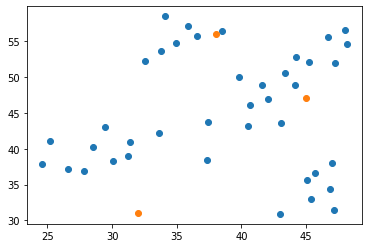

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])
plt.scatter(Centers[:,0],Centers[:,1])
plt.show()

In [ ]:
k = 3
n = int(data.size / 2)
print(np.zeros(0))


[]


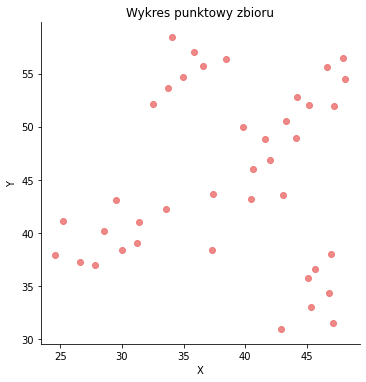

In [ ]:
import seaborn as sns

sns.lmplot(data = data_src, x = 'X', y = 'Y', fit_reg = False, scatter_kws = {"color": "#eb6c6a"}).set(title = 'Wykres punktowy zbioru')
plt.show()

**zad 1.C:**

In [ ]:
print("Centers:");
print(Centers);
n = int(data.size / 2);
print("");

d = [0, 0, 0]
#NData_pr = []
"""
column_names = ["X", "Y"]
NData_0 = pd.DataFrame(columns = column_names)
NData_1 = pd.DataFrame(columns = column_names)
NData_2 = pd.DataFrame(columns = column_names)
"""
NData_0 = []
NData_1 = []
NData_2 = []

for i in range(n):
  for j in range(3):
    d[j] = math.sqrt( ((float(data[i,0]) - Centers[j][0]) **2) + (float(data[i,1]) - Centers[j][1]) **2 )
  
  if min(d) == d[0]:
    NData_0.append([data[i, 0], data[i, 1]])
    #np.column_stack((NData_0, np.array([data[i,0], data[i,1]])))
    #NData_pr = np.append(prs, [0], axis = 0)
  elif min(d) == d[1]:
    NData_1.append([data[i,0], data[i,1]])
    #NData_pr = np.append(prs, [1], axis = 0)
  else:
    NData_2.append([data[i,0], data[i,1]])
    #NData_pr = np.append(prs, [2], axis = 0)

#NewData = np.concatenate([data,prs],axis=1)

Centers:
[[41. 34.]
 [35. 52.]
 [35. 48.]]



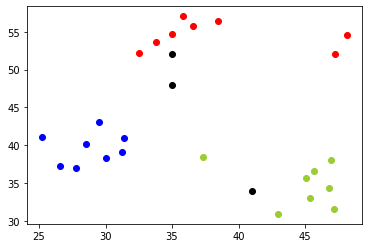

In [ ]:
for i in range (len(NData_0)):
  plt.scatter(NData_0[i][0], NData_0[i][1], c = "yellowgreen");

for i in range (len(NData_0)):
  plt.scatter(NData_1[i][0], NData_1[i][1], c = "red")

for i in range (len(NData_0)):
  plt.scatter(NData_2[i][0], NData_2[i][1], c = "blue")

plt.scatter(Centers[:,0], Centers[:,1], c = "black")
plt.show()

**zad.2**

In [ ]:
from scipy.spatial import distance
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sklearn.metrics as sm

data = pd.read_csv('ED_lab_6/iris.csv')
local_data = data
data = np.array(data)
local_arr = data.copy()

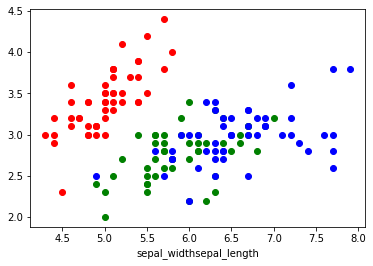

In [ ]:
Setosa = []
Versicolour = []
Virginica = []
color = []

for i in range(len(local_arr)):
  if local_arr[i][4] == 'setosa':
    color.append('r')
  elif local_arr[i][4] == 'versicolor':
    color.append('g')
  elif local_arr[i][4] == 'virginica':
    color.append('b')

for i in range(len(local_arr)):
  plt.scatter(local_arr[i][0], local_arr[i][1], c=color[i])

plt.xlabel('sepal_widthsepal_length')
plt.ylabel('')
plt.show()

In [ ]:
# 3
print('sepal_length min: ', local_data['sepal_length'].min())
print('sepal_length max: ', local_data['sepal_length'].max())
print('sepal_length odchylenie: ', np.std(local_data['sepal_length'] ** 2))
print("")

print('sepal_width min: ', local_data['sepal_width'].min())
print('sepal_width max: ', local_data['sepal_width'].max())
print('sepal_width odchylenie: ',np.std(local_data['sepal_width'] ** 2))
print("")

print('petal_length min: ', local_data['petal_length'].min())
print('petal_length max: ', local_data['petal_length'].max())
print('petal_length odchylenie: ',np.std(local_data['petal_length'] ** 2))
print("")

print('petal_width min: ', local_data['petal_width'].min())
print('petal_width max: ', local_data['petal_width'].max())
print('petal_width odchylenie: ', np.std(local_data['petal_width'] ** 2))

sepal_length min:  4.3
sepal_length max:  7.9
sepal_length odchylenie:  9.888593322049855

sepal_width min:  2.0
sepal_width max:  4.4
sepal_width odchylenie:  2.7150387146820267

petal_length min:  1.0
petal_length max:  6.9
petal_length odchylenie:  12.582560947597278

petal_width min:  0.1
petal_width max:  2.5
petal_width odchylenie:  1.8243160057645964


In [ ]:
coef = np.corrcoef(local_data['sepal_length'], local_data['sepal_width'])
print('sepal_length / sepal_width:\n', coef)
print("")

coef = np.corrcoef(local_data['sepal_length'], local_data['petal_length'])
print('sepal_length / petal_length:\n', coef)
print("")

coef = np.corrcoef(local_data['sepal_length'], local_data['petal_width'])
print('sepal_length / petal_width:\n', coef)
print("")

coef = np.corrcoef(local_data['sepal_width'], local_data['petal_length'])
print('sepal_width / petal_length:\n', coef)
print("")

coef = np.corrcoef(local_data['sepal_width'], local_data['petal_width'])
print('sepal_width / petal_width:\n', coef)
print("")

coef = np.corrcoef(local_data['petal_length'], local_data['petal_width'])
print('petal_length / petal_width:\n', coef)


sepal_length / sepal_width:
 [[ 1.         -0.10936925]
 [-0.10936925  1.        ]]

sepal_length / petal_length:
 [[1.         0.87175416]
 [0.87175416 1.        ]]

sepal_length / petal_width:
 [[1.         0.81795363]
 [0.81795363 1.        ]]

sepal_width / petal_length:
 [[ 1.        -0.4205161]
 [-0.4205161  1.       ]]

sepal_width / petal_width:
 [[ 1.         -0.35654409]
 [-0.35654409  1.        ]]

petal_length / petal_width:
 [[1.        0.9627571]
 [0.9627571 1.       ]]


In [ ]:
# 5 
sts_count = 0
vrs_count = 0
vrg_count = 0

for i in local_arr:
  if i[4] == 'setosa':
    sts_count += i[3]
  if i[4] == 'versicolor':
    vrs_count += i[3]
  if i[4] == 'virginica':
    vrg_count += i[3]

print("Setosa petal_length:     ", sts_count)
print("Versicolor petal_length: ", vrs_count)
print("Virginica petal_length:  ", vrg_count)
print("")
print("Stwierdzenie jest prawdziwe – \"petal_length\" klasy Setosa jest krótsze niż \"petal_length\" innych klas")

Setosa petal_length:      12.199999999999996
Versicolor petal_length:  66.3
Virginica petal_length:   101.29999999999998

Stwierdzenie jest prawdziwe – "petal_length" klasy Setosa jest krótsze niż "petal_length" innych klas


In [ ]:
# 6
X = []

for i in local_arr:
  X.append([i[0], i[1]])

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plt.plot(range(1, 10), wcss)
#plt.show()

for i in range(len(X)):
  print(X[i][0]," ",X[i][1])
  

5.1   3.5
4.9   3.0
4.7   3.2
4.6   3.1
5.0   3.6
5.4   3.9
4.6   3.4
5.0   3.4
4.4   2.9
4.9   3.1
5.4   3.7
4.8   3.4
4.8   3.0
4.3   3.0
5.8   4.0
5.7   4.4
5.4   3.9
5.1   3.5
5.7   3.8
5.1   3.8
5.4   3.4
5.1   3.7
4.6   3.6
5.1   3.3
4.8   3.4
5.0   3.0
5.0   3.4
5.2   3.5
5.2   3.4
4.7   3.2
4.8   3.1
5.4   3.4
5.2   4.1
5.5   4.2
4.9   3.1
5.0   3.2
5.5   3.5
4.9   3.1
4.4   3.0
5.1   3.4
5.0   3.5
4.5   2.3
4.4   3.2
5.0   3.5
5.1   3.8
4.8   3.0
5.1   3.8
4.6   3.2
5.3   3.7
5.0   3.3
7.0   3.2
6.4   3.2
6.9   3.1
5.5   2.3
6.5   2.8
5.7   2.8
6.3   3.3
4.9   2.4
6.6   2.9
5.2   2.7
5.0   2.0
5.9   3.0
6.0   2.2
6.1   2.9
5.6   2.9
6.7   3.1
5.6   3.0
5.8   2.7
6.2   2.2
5.6   2.5
5.9   3.2
6.1   2.8
6.3   2.5
6.1   2.8
6.4   2.9
6.6   3.0
6.8   2.8
6.7   3.0
6.0   2.9
5.7   2.6
5.5   2.4
5.5   2.4
5.8   2.7
6.0   2.7
5.4   3.0
6.0   3.4
6.7   3.1
6.3   2.3
5.6   3.0
5.5   2.5
5.5   2.6
6.1   3.0
5.8   2.6
5.0   2.3
5.6   2.7
5.7   3.0
5.7   2.9
6.2   2.9
5.1   2.5
5.7   2.8


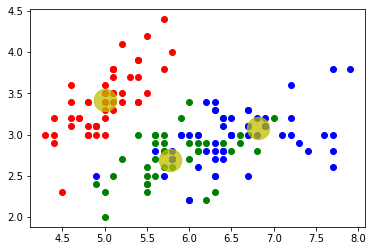

[5.006      6.81276596 5.77358491] [3.418      3.07446809 2.69245283]


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 150, n_init = 150, random_state = 0)
pred_y = kmeans.fit_predict(X)

for i in range(len(X)):
  plt.scatter(X[i][0],X[i][1], c = color[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'y', alpha = 0.75)
plt.show()
print(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

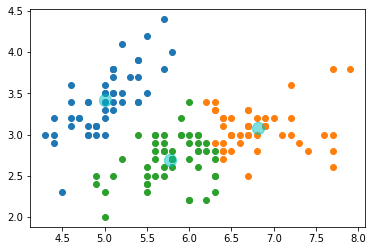

In [ ]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(X)

v = []
for i in range(len(X)):
  v.append([X[i][0], X[i][1]])
j=np.array(v)

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(j[label == i , 0] , j[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 150, color = 'c', alpha = 0.5)

plt.show()
